# Implementing Custom RandomSearchCV

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

## Making the data set 
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
print('Number of Data points :',x.shape[0])
print('Number of features :',x.shape[1])

## Spliting the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


Number of Data points : 10000
Number of features : 2


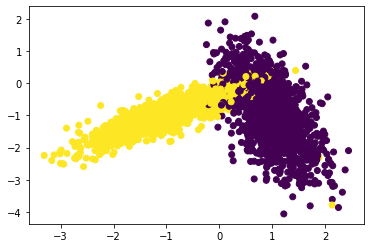

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [3]:
# Random SearchCV Function
def RandomSearchCV(x_train, y_train, classifier, param_range, folds):
    
    np.random.seed(0)
    k_values=[] # Creating uniform random variable from the given range 
    low,high=param_range
    ran = np.random.uniform(low,high,size=10) 
    while True:
        if len(k_values)==10:
            break
        ran = np.random.uniform(low,high)
        ran=int(ran)
        #print(ran)
        if ran not in k_values:
            #print(ran)
            k_values.append(ran)
        else:
            continue
            
    #print(k_values)
    k_values=sorted(k_values) # Sorting the K Values.

    div=int(len(x_train)/folds) # Getting the number data points per divisions by dividing total no. of points by no. of folds.
    #print(div)
    #print(len(X_train))
    
    data_x=[]
    data_y=[]
    #print(len(x_train))
    for fold in range(folds): # Iterating over number of folds to create dataset.
            
        if fold==folds-1:
            a=y_train[fold*div:]
            b=x_train[fold*div:]
            data_x.append(b)
            data_y.append(a)
        else:
            a=y_train[fold*div:(fold+1)*div]
            b=x_train[fold*div:(fold+1)*div]
            data_x.append(b)
            data_y.append(a)
    #print(data_x)
    #print(data_y)
    x_data=data_x.copy()
    y_data=data_y.copy()
    #print(y_data)
    #print(x_data)  
    
    train_accuracy=[] 
    cv_accuracy=[]
    for param in k_values: # Iterating over the k values generated above.
        #print(param)
        
        fold_train=[] 
        fold_cv=[]
        #print(folds)
        
        # Dividing the training data into training and cross validation set.
        for fold in range(folds): 
            
            #print(fold)
            data_x=x_data.copy()
            #print('before',data_x)
            data_y=y_data.copy()
            cv_x=data_x.pop(fold)
            cv_y=data_y.pop(fold)
            #print('after',data_x)
            TRAINx=[]
            TRAINy=[]
            #print('before',data_x)
            #print('after',list(data_x))
            for i,j in zip(data_x,data_y):
                for k,j in zip(i,j):
                    TRAINx.append(k)
                    TRAINy.append(j)
            #print(len(TRAINx))
            #print(len(TRAINy))
            #print(len(cv_x))
            #print(len(cv_y))
        
            classifier.n_neighbors=param
            classifier.fit(TRAINx, TRAINy) # Fitting the model the data splitted above with respoective k value.
            
            predictions=classifier.predict(TRAINx) # Making predictions on training data.
            fold_train.append(accuracy_score(TRAINy,predictions)) # Calculating the training accuracy and saving it. 
            
            predictions=classifier.predict(cv_x) # Making predictions on cross validation data.
            fold_cv.append(accuracy_score(cv_y,predictions)) # Calculating the cv accuracy and saving it.
        
        #print(fold_train)
        #print(fold_cv)
        train_accuracy.append(np.mean(fold_train)) # Storing the mean accuracy of training data from the respective k value.
        cv_accuracy.append(np.mean(fold_cv)) # Storing the mean accuracy of cv data from the respective k value.
        
    #print('Train',train_accuracy)
    #print('CV',cv_accuracy)
    
    return train_accuracy, cv_accuracy, k_values

K Values : [1, 4, 5, 26, 28, 39, 41, 43, 46, 48]
Max accuracy  95.67999999999999  with k value  48


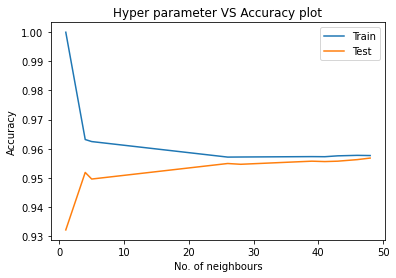

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

param_range=(1,50)
folds=3
classifier = KNeighborsClassifier()

train_accuracy, cv_accuracy, k_values = RandomSearchCV(X_train, y_train, classifier, param_range=(1,50), folds=5)
#print(train_accuracy)
#print(cv_accuracy)

acc_max=cv_accuracy.index(max(cv_accuracy)) # Retrieving the index of max accuracy from Cross validation data. 
print('K Values :',k_values)
print('Max accuracy ',cv_accuracy[acc_max]*100,' with k value ',k_values[acc_max])

# Plotting Hyper-Parameter and Accuracy 
plt.plot(k_values, train_accuracy, label='Train')
plt.plot(k_values, cv_accuracy, label='Test')
plt.title('Hyper parameter VS Accuracy plot')
plt.legend()
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy')
plt.show()

In [5]:
# Decision Boundary Plot
def plot_decision_boundary(X1, X2, y, clf):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision boundary (k = %i)" % (clf.n_neighbors))
    plt.show()

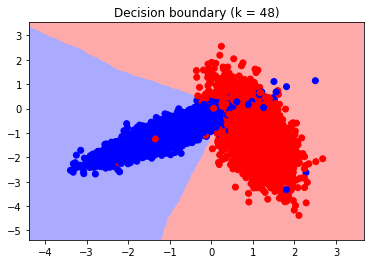

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = k_values[acc_max])
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)